Hypothesis: do the companies with more than 1B in cash have a significant difference in returns by the end of the year?

In [30]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

# what are we achieving from here? defining the function of 95%? giving the formula
# whats matplotlib inline?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
# hyperlink_format = <a href="{C:\Users\GaukharJavarova\Downloads\indicators}">{indicators}</a>
# how to put a hyperlink here

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
stocks.shape

(40277, 31)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
stocks["cashneq"].describe()  # here, numbers are given in Millions? go over numbers

count    3.941600e+04
mean     5.317810e+09
std      1.080713e+11
min      0.000000e+00
25%      7.426350e+07
50%      2.117000e+08
75%      6.499245e+08
max      5.314380e+12
Name: cashneq, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

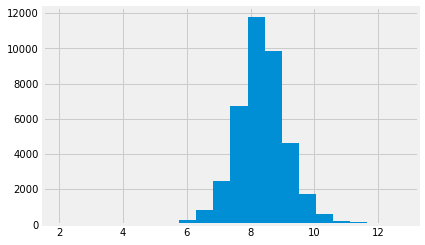

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
a = stocks["cashneq"].dropna()
b = a.apply(np.log10)
b[np.isfinite(b)].hist(bins=20)
plt.show()

# add description on x, y; why does it have NA values? what could it be?
# didn't get this well.
# log, what does it give?
# b[np.isfinite(b)]

In [41]:
stocks["enough_cash"] = np.where(
    stocks["cashneq"] > 1000000000, 1, 0
)  # if more than 1 B yes = 1, if no = 0. instead put "yes", 'no'
#  i'm asking more than 1B but why is 0 here, #can delete np.where, 1, 0; will give True or False.
# 1 could be for stocks having enough cash, but why 0??

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"] #finding every record thats on that date. end of the first quarter. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
df2018[["ticker", "calendardate", "enough_cash", "cashneq"]].head()

,ticker,calendardate,enough_cash,cashneq
8,ZYME,2018-03-31,0,3.098100e+07
23,ZUO,2018-03-31,0,2.027340e+08
37,ZTS,2018-03-31,1,1.654000e+09
58,ZS,2018-03-31,0,2.874430e+08
72,ZNGA,2018-03-31,0,3.715880e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
df2018.shape

(1985, 32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"] #finding every record for date row and giving it out. 

df2019 = stocks[stocks["calendardate"] == "2019-03-31"] #end of the first quarter
df2019 = df2019.rename(
    columns={"price": "price2019", "calendardate": "calendardate2019"}
)
# from dataframe 2018 took everything, since it's a main one, left all columns in it.
# from 2019 chose only:price, calendardate
# renamed them into +2019. the column calendardate made equal to the dates i need.

<IPython.core.display.Javascript object>

In [16]:
# df2019.info()

<IPython.core.display.Javascript object>

In [50]:
df2018 = pd.merge(
    df2018,
    df2019[["ticker", "price2019", "calendardate2019"]],
    how="inner",
    on="ticker",
)
df2018.info()
# merging here df2019 and df2018 two dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1351 non-null   object 
 1   revenue                  1351 non-null   float64
 2   pb                       1351 non-null   float64
 3   debt                     1351 non-null   float64
 4   assets                   1351 non-null   float64
 5   netmargin                1351 non-null   float64
 6   ncfo                     1351 non-null   float64
 7   shareswa                 1351 non-null   float64
 8   sps                      1351 non-null   float64
 9   opinc                    1351 non-null   float64
 10  assetsc                  1351 non-null   float64
 11  liabilitiesc             1351 non-null   float64
 12  price                    1351 non-null   float64
 13  calendardate             1351 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
df2018 = df2018.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
df2018 = df2018[df2018["return"] <= 2]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

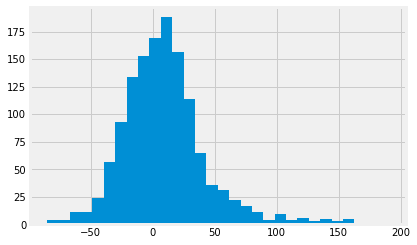

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018[
    "price"
]  # looking at the percent difference
(100 * df2018["return"]).hist(bins=30)
plt.show()
print(stats.describe(df2018["return"]))

In [71]:
df2018

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019_x,calendardate2019_x,price2019_y,calendardate2019_y,price2019,calendardate2019,return
0,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,2.597000,0.570081,1,100.67,2019-03-31,100.67,2019-03-31,100.67,2019-03-31,0.205484
1,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,3.170025,0.000000,0,5.33,2019-03-31,5.33,2019-03-31,5.33,2019-03-31,0.456284
2,ZIOP,1.460000e+05,-4.533,0.000000e+00,8.746100e+07,-144.795,-1.895700e+07,140853120.0,0.001,-16196000.0,...,5.093818,0.000000,0,3.85,2019-03-31,3.85,2019-03-31,3.85,2019-03-31,-0.017857
3,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,103692000.0,1.252,-33615000.0,...,3.026127,0.395455,0,85.00,2019-03-31,85.00,2019-03-31,85.00,2019-03-31,0.775642
4,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,53286249.0,18.335,144000000.0,...,0.574034,0.502000,0,209.53,2019-03-31,209.53,2019-03-31,209.53,2019-03-31,0.505352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,73979000.0,38.847,198241000.0,...,0.361917,0.121272,0,175.40,2019-03-31,175.40,2019-03-31,175.40,2019-03-31,0.690439
1347,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,1.352039,0.000000,0,46.18,2019-03-31,46.18,2019-03-31,46.18,2019-03-31,0.184103
1348,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,0.434737,0.464321,0,31.76,2019-03-31,31.76,2019-03-31,31.76,2019-03-31,-0.388761
1349,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,0.738239,0.085400,1,28.16,2019-03-31,28.16,2019-03-31,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

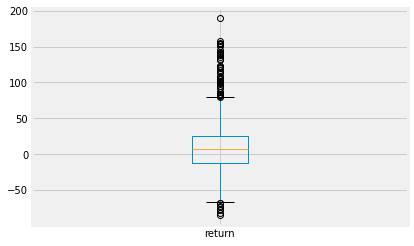

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
(100 * df2018["return"]).plot.box()
# do the drop() of more than
# drop the high percent change observations

# and re-look at the distribution

# (skew/kurtosis)

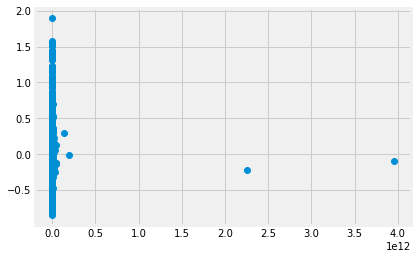

DescribeResult(nobs=1340, minmax=(0.0, 3953513000000.0), mean=5901320083.93209, variance=1.5497371861958475e+22, skewness=28.241213681892198, kurtosis=832.5708717639244)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
plt.plot(df2018["cashneq"], df2018["return"], "o")
plt.show()
print(stats.describe(df2018["cashneq"]))


In [95]:
df2018[df2018["return"] <= 2]  # i'm taking only those who made less than 400%

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019_x,calendardate2019_x,price2019_y,calendardate2019_y,price2019,calendardate2019,return
0,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,2.597000,0.570081,1,100.67,2019-03-31,100.67,2019-03-31,100.67,2019-03-31,0.205484
1,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,3.170025,0.000000,0,5.33,2019-03-31,5.33,2019-03-31,5.33,2019-03-31,0.456284
2,ZIOP,1.460000e+05,-4.533,0.000000e+00,8.746100e+07,-144.795,-1.895700e+07,140853120.0,0.001,-16196000.0,...,5.093818,0.000000,0,3.85,2019-03-31,3.85,2019-03-31,3.85,2019-03-31,-0.017857
3,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,103692000.0,1.252,-33615000.0,...,3.026127,0.395455,0,85.00,2019-03-31,85.00,2019-03-31,85.00,2019-03-31,0.775642
4,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,53286249.0,18.335,144000000.0,...,0.574034,0.502000,0,209.53,2019-03-31,209.53,2019-03-31,209.53,2019-03-31,0.505352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,73979000.0,38.847,198241000.0,...,0.361917,0.121272,0,175.40,2019-03-31,175.40,2019-03-31,175.40,2019-03-31,0.690439
1347,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,1.352039,0.000000,0,46.18,2019-03-31,46.18,2019-03-31,46.18,2019-03-31,0.184103
1348,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,0.434737,0.464321,0,31.76,2019-03-31,31.76,2019-03-31,31.76,2019-03-31,-0.388761
1349,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,0.738239,0.085400,1,28.16,2019-03-31,28.16,2019-03-31,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
df2018[df2018["enough_cash"] == 1]  # for dropping the high % of those above

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019_x,calendardate2019_x,price2019_y,calendardate2019_y,price2019,calendardate2019,return
0,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,4.859000e+08,2.811,4.640000e+08,...,2.597000,0.570081,1,100.67,2019-03-31,100.67,2019-03-31,100.67,2019-03-31,0.205484
5,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,2.030000e+08,9.939,3.050000e+08,...,0.929742,0.408808,1,127.70,2019-03-31,127.70,2019-03-31,127.70,2019-03-31,0.171130
9,YNDX,2.657300e+10,5.193,1.790300e+10,2.129050e+11,0.090,5.187000e+09,3.270667e+08,1.422,3.159000e+09,...,2.533172,0.084089,1,34.34,2019-03-31,34.34,2019-03-31,34.34,2019-03-31,-0.129531
13,XRX,2.435000e+09,1.320,5.489000e+09,1.617500e+10,0.009,2.160000e+08,2.546735e+08,9.561,1.340000e+08,...,2.033312,0.339351,1,31.98,2019-03-31,31.98,2019-03-31,31.98,2019-03-31,0.111188
16,XOM,6.821100e+10,1.680,4.061700e+10,3.488260e+11,0.068,8.519000e+09,4.237462e+09,16.097,7.444000e+09,...,0.477747,0.116439,1,80.80,2019-03-31,80.80,2019-03-31,80.80,2019-03-31,0.082965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,ABBV,7.934000e+09,42.303,3.728700e+10,6.934200e+10,0.351,2.645000e+09,1.591000e+09,4.987,2.903000e+09,...,0.897819,0.537726,1,80.59,2019-03-31,80.59,2019-03-31,80.59,2019-03-31,-0.148547
1343,ABB,6.441000e+09,3.790,7.761000e+09,4.356900e+10,0.089,-5.180000e+08,2.134000e+09,3.018,6.090000e+08,...,0.691978,0.178131,1,18.87,2019-03-31,18.87,2019-03-31,18.87,2019-03-31,-0.205139
1345,AAPL,6.113700e+10,6.710,1.218400e+11,3.675020e+11,0.226,1.513000e+10,5.024877e+09,12.167,1.589400e+10,...,1.235423,0.331536,1,189.95,2019-03-31,189.95,2019-03-31,189.95,2019-03-31,0.132137
1349,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,1.861756e+08,16.597,5.170000e+08,...,0.738239,0.085400,1,28.16,2019-03-31,28.16,2019-03-31,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

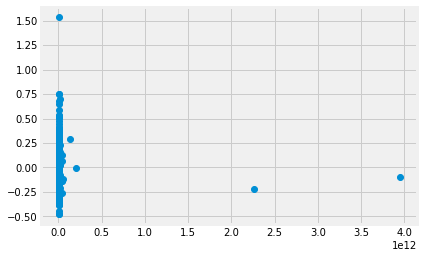

DescribeResult(nobs=1340, minmax=(0, 1), mean=0.17686567164179104, variance=0.14569293190507507, skewness=1.6937759530596366, kurtosis=0.868876979163081)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
cash_rich = df2018[df2018["enough_cash"] == 1]
plt.plot(cash_rich["cashneq"], cash_rich["return"], "o")
plt.show()
print(stats.describe(df2018["enough_cash"]))

In [98]:
# df2018 = df2018.dropna()
# print(df2018)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

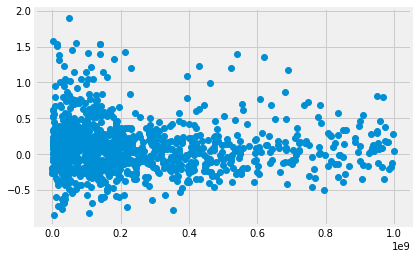

DescribeResult(nobs=1103, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.10312877521986828, variance=0.13002305445175777, skewness=1.1015188501523943, kurtosis=2.7832849383775278)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
cash_weak = df2018[df2018["enough_cash"] == 0]
plt.plot(cash_weak["cashneq"], cash_weak["return"], "o")
plt.show()
print(stats.describe(cash_weak["return"]))

In [100]:
# paired_pain = pain[["audio_book", "control"]]
# paired_pain["diff"] = pain["audio_book"] - pain["control"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
# paired_pain["diff"].hist()
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
paired = df2018[['return']]
paired['diff'] = 
paired t-test requires construction of a new variable which will be the difference of two observations per subject, and then testing whether the mean of this new variable is significantly different from zero.

so you can store the value from one t test in a variable and then store the second in another variable and compare the two

SyntaxError: invalid syntax (<ipython-input-102-b9a0fcab15e1>, line 2)

ERROR:root:Cannot parse: 2:17: paired['diff'] = 
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:17: paired['diff'] = 
ERROR:root:Cannot parse: 2:17: paired['diff'] = 
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\progra

In [103]:
# stats.ttest_ind(cash_rich["return"].dropna(), cash_weak["return"].dropna())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ttest shows the significant difference between values, therefore rejecting the null hypotheses. 
    We see that companies, which have cash and equivalents on hands tend to perform better than those which don't have. We can see the differences in returns in both groups, while companies with no cash loose money when cash_rich companies ACTUALLY DIDN'T GET THE INTERPRETATION OF THIS CHART. 
    what's the confidence interval here??

Non-normal: Mann-Whitney U (independent)

In [92]:
#stats.wilcoxon((cash_rich["return"] - cash_weak["return"]))

WilcoxonResult(statistic=0.0, pvalue=1.2189002002926023e-220)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
# pvalue less than 0.5 so it's still not normal, what am i gonna do?? conduct a new hypothesis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>